<a href="https://colab.research.google.com/github/Python-Neiva/risk-factors-covid19/blob/main/risk_factor_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Request

In [110]:
import requests

csv_url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?&accessType=DOWNLOAD&api_foundry=true"
#csv_url = "./content/sample_data/sample_downloaded.csv"
root_path = "/content/drive/MyDrive/Salisbury/data/covid_downloaded.csv"
def downloadDataCsv(csv_url,root_path):
  req = requests.get(csv_url)
  url_content = req.content
  try:
      csv_file = open(root_path, 'wb')

      csv_file.write(url_content)

      csv_file.close()
      print("I finished to write csv")
  except:
      print("something was wrong")

#downloadDataCsv(csv_url,root_path)

#Model

In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import math

# import os
# !pip install sodapy -q
# !pip install socrata-py -q

# from sodapy import Socrata
# from socrata.authorization import Authorization


In [112]:
def requestColombianData(limit = 1000):
  client = Socrata(
                  "www.datos.gov.co",
                  "idLwSviPi5dGMTd7GfIfW3CLU",
                  #username="sebastian_romerola@fet.edu.co",
                  #password="Sebastian#2018",
                  timeout=300
                  )
  results = client.get("gt2j-8ykr",
                      #  ciudad_municipio_nom="Neiva",
                      departamento_nom="HUILA",
                      limit=limit
                      )
  
  return pd.DataFrame.from_records(results)


def getCsvDataSet(path='/content/drive/MyDrive/Salisbury/data/covid_downloaded.csv'):
  return pd.read_csv(r''+path, low_memory=False)

In [113]:
#dataset from csv
#df = getCsvDataSet()

path_huila_csv = "/content/drive/MyDrive/Salisbury/data/covid_downloaded_huila1.csv" # Huila data to do not overpast the power
df = getCsvDataSet(path_huila_csv)

#dataset from API
# df = None
# df = requestColombianData(90000)

In [114]:
df.head(20)

,web_date_report,case_id,notification_date,davipola_departament_code,department_name,davipola_municipality_code,municipality_name,age,age_measurement_unit,sex,contagion_type,case_location,state,iso_country_code,country_name,recuperated,beginning_symptoms_date,date_of_death,date_of_diagnosis,date_of_recovery,recovery_type,ethnicity,ethnic_group_name
0,12/3/2020 0:00:00,12,10/3/2020 0:00:00,41,HUILA,41001,NEIVA,74,1,F,IMPORTADO,CASA,LEVE,380.0,ITALIA,RECUPERADO,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,9/4/2020 0:00:00,PCR,6.0,NaN
1,12/3/2020 0:00:00,13,10/3/2020 0:00:00,41,HUILA,41001,NEIVA,68,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,30/3/2020 0:00:00,PCR,6.0,NaN
2,12/3/2020 0:00:00,29,12/3/2020 0:00:00,41,HUILA,41001,NEIVA,55,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,10/3/2020 0:00:00,NaN,14/3/2020 0:00:00,25/3/2020 0:00:00,PCR,6.0,NaN
3,14/3/2020 0:00:00,41,14/3/2020 0:00:00,41,HUILA,41001,NEIVA,79,1,M,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,NaN,NaN,15/3/2020 0:00:00,28/3/2020 0:00:00,PCR,6.0,NaN
4,14/3/2020 0:00:00,42,14/3/2020 0:00:00,41,HUILA,41001,NEIVA,52,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,10/3/2020 0:00:00,NaN,15/3/2020 0:00:00,24/3/2020 0:00:00,PCR,6.0,NaN
5,14/3/2020 0:00:00,43,14/3/2020 0:00:00,41,HUILA,41001,NEIVA,71,1,M,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,9/3/2020 0:00:00,NaN,15/3/2020 0:00:00,24/3/2020 0:00:00,PCR,6.0,NaN
6,14/3/2020 0:00:00,44,14/3/2020 0:00:00,41,HUILA,41001,NEIVA,24,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,10/3/2020 0:00:00,NaN,15/3/2020 0:00:00,24/3/2020 0:00:00,PCR,6.0,NaN
7,17/3/2020 0:00:00,90,15/3/2020 0:00:00,41,HUILA,41001,NEIVA,53,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,15/3/2020 0:00:00,NaN,17/3/2020 0:00:00,30/3/2020 0:00:00,PCR,6.0,NaN
8,19/3/2020 0:00:00,124,16/3/2020 0:00:00,41,HUILA,41001,NEIVA,76,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,8/3/2020 0:00:00,NaN,19/3/2020 0:00:00,4/4/2020 0:00:00,PCR,6.0,NaN
9,21/3/2020 0:00:00,196,19/3/2020 0:00:00,41,HUILA,41001,NEIVA,50,1,F,IMPORTADO,CASA,LEVE,724.0,ESPAÑA,RECUPERADO,12/3/2020 0:00:00,NaN,21/3/2020 0:00:00,2/4/2020 0:00:00,PCR,6.0,NaN


In [115]:

print(df.columns)
english_columns = list()
english_columns = [
  'web_date_report',
  'case_id',
  'notification_date',
  'davipola_departament_code',
  'department_name',
  'davipola_municipality_code',
  'municipality_name',
  'age',
  'age_measurement_unit',
  'sex',
  'contagion_type',
  'case_location',
  'state',
  'iso_country_code',
  'country_name',
  'recuperated',
  'beginning_symptoms_date',
  'date_of_death',
  'date_of_diagnosis',
  'date_of_recovery',
  'recovery_type',
  'ethnicity',
  'ethnic_group_name',
]

df.columns = english_columns
print("-----")
print(df.columns)

Index(['web_date_report', 'case_id', 'notification_date',
       'davipola_departament_code', 'department_name',
       'davipola_municipality_code', 'municipality_name', 'age',
       'age_measurement_unit', 'sex', 'contagion_type', 'case_location',
       'state', 'iso_country_code', 'country_name', 'recuperated',
       'beginning_symptoms_date', 'date_of_death', 'date_of_diagnosis',
       'date_of_recovery', 'recovery_type', 'ethnicity', 'ethnic_group_name'],
      dtype='object')
-----
Index(['web_date_report', 'case_id', 'notification_date',
       'davipola_departament_code', 'department_name',
       'davipola_municipality_code', 'municipality_name', 'age',
       'age_measurement_unit', 'sex', 'contagion_type', 'case_location',
       'state', 'iso_country_code', 'country_name', 'recuperated',
       'beginning_symptoms_date', 'date_of_death', 'date_of_diagnosis',
       'date_of_recovery', 'recovery_type', 'ethnicity', 'ethnic_group_name'],
      dtype='object')


In [116]:
df.head()

,web_date_report,case_id,notification_date,davipola_departament_code,department_name,davipola_municipality_code,municipality_name,age,age_measurement_unit,sex,contagion_type,case_location,state,iso_country_code,country_name,recuperated,beginning_symptoms_date,date_of_death,date_of_diagnosis,date_of_recovery,recovery_type,ethnicity,ethnic_group_name
0,12/3/2020 0:00:00,12,10/3/2020 0:00:00,41,HUILA,41001,NEIVA,74,1,F,IMPORTADO,CASA,LEVE,380.0,ITALIA,RECUPERADO,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,9/4/2020 0:00:00,PCR,6.0,NaN
1,12/3/2020 0:00:00,13,10/3/2020 0:00:00,41,HUILA,41001,NEIVA,68,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,30/3/2020 0:00:00,PCR,6.0,NaN
2,12/3/2020 0:00:00,29,12/3/2020 0:00:00,41,HUILA,41001,NEIVA,55,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,10/3/2020 0:00:00,NaN,14/3/2020 0:00:00,25/3/2020 0:00:00,PCR,6.0,NaN
3,14/3/2020 0:00:00,41,14/3/2020 0:00:00,41,HUILA,41001,NEIVA,79,1,M,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,NaN,NaN,15/3/2020 0:00:00,28/3/2020 0:00:00,PCR,6.0,NaN
4,14/3/2020 0:00:00,42,14/3/2020 0:00:00,41,HUILA,41001,NEIVA,52,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,10/3/2020 0:00:00,NaN,15/3/2020 0:00:00,24/3/2020 0:00:00,PCR,6.0,NaN


In [117]:
df.astype = {
  "web_date_report": np.str,
  "case_id": np.str, #ordinal
  "notification_date": np.str,
  "davipola_departament_code": np.int, #categorical
  "department_name": np.str, #categorical
  "davipola_municipality_code": np.str, #categorical
  "municipality_name": np.str, #categorical
  "age": np.int,
  "age_measurement_unit": np.int,
  "sex": np.str, #nominal
  "contagion_type": np.str, #categorical
  "case_location": np.str, #categorical
  "state": np.str, #ordinal
  "iso_country_code": np.int, #categorical
  "country_name": np.str, #categorical
  "recuperated": np.str, ##categorical
  "beginning_symptoms_date": np.str, #
  "date_of_diagnosis": np.str,
  "date_of_recovery": np.str,
  "recovery_type": np.str, #categorica
  "ethnicity": np.int, #nominal
  "ethnic_group_name": np.str, #nominal
  "date_of_death": np.str,
}

#change column type in df

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81572 entries, 0 to 81571
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   web_date_report             81572 non-null  object 
 1   case_id                     81572 non-null  int64  
 2   notification_date           81572 non-null  object 
 3   davipola_departament_code   81572 non-null  int64  
 4   department_name             81572 non-null  object 
 5   davipola_municipality_code  81572 non-null  int64  
 6   municipality_name           81572 non-null  object 
 7   age                         81572 non-null  int64  
 8   age_measurement_unit        81572 non-null  int64  
 9   sex                         81572 non-null  object 
 10  contagion_type              81572 non-null  object 
 11  case_location               81277 non-null  object 
 12  state                       81277 non-null  object 
 13  iso_country_code            22 

In [119]:
df.describe()

,case_id,davipola_departament_code,davipola_municipality_code,age,age_measurement_unit,iso_country_code,ethnicity
count,8.157200e+04,81572.0,81572.000000,81572.000000,81572.000000,22.000000,80579.000000
mean,2.229969e+06,41.0,41165.728216,40.493723,1.003923,537.090909,5.953896
std,1.355254e+06,0.0,255.512829,17.786207,0.068856,254.366610,0.471003
min,1.200000e+01,41.0,41001.000000,1.000000,1.000000,214.000000,1.000000
25%,1.022241e+06,41.0,41001.000000,27.000000,1.000000,276.000000,6.000000
50%,1.898528e+06,41.0,41001.000000,38.000000,1.000000,544.000000,6.000000
75%,3.554832e+06,41.0,41306.000000,52.000000,1.000000,811.000000,6.000000
max,4.639482e+06,41.0,41885.000000,104.000000,3.000000,840.000000,6.000000


In [120]:
np.shape(df)

(81572, 23)

In [121]:
df.columns

Index(['web_date_report', 'case_id', 'notification_date',
       'davipola_departament_code', 'department_name',
       'davipola_municipality_code', 'municipality_name', 'age',
       'age_measurement_unit', 'sex', 'contagion_type', 'case_location',
       'state', 'iso_country_code', 'country_name', 'recuperated',
       'beginning_symptoms_date', 'date_of_death', 'date_of_diagnosis',
       'date_of_recovery', 'recovery_type', 'ethnicity', 'ethnic_group_name'],
      dtype='object')

uppercase to each str row

In [122]:
df.select_dtypes(include='object')

,web_date_report,notification_date,department_name,municipality_name,sex,contagion_type,case_location,state,country_name,recuperated,beginning_symptoms_date,date_of_death,date_of_diagnosis,date_of_recovery,recovery_type,ethnic_group_name
0,12/3/2020 0:00:00,10/3/2020 0:00:00,HUILA,NEIVA,F,IMPORTADO,CASA,LEVE,ITALIA,RECUPERADO,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,9/4/2020 0:00:00,PCR,NaN
1,12/3/2020 0:00:00,10/3/2020 0:00:00,HUILA,NEIVA,F,RELACIONADO,CASA,LEVE,NaN,RECUPERADO,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,30/3/2020 0:00:00,PCR,NaN
2,12/3/2020 0:00:00,12/3/2020 0:00:00,HUILA,NEIVA,F,RELACIONADO,CASA,LEVE,NaN,RECUPERADO,10/3/2020 0:00:00,NaN,14/3/2020 0:00:00,25/3/2020 0:00:00,PCR,NaN
3,14/3/2020 0:00:00,14/3/2020 0:00:00,HUILA,NEIVA,M,RELACIONADO,CASA,LEVE,NaN,RECUPERADO,NaN,NaN,15/3/2020 0:00:00,28/3/2020 0:00:00,PCR,NaN
4,14/3/2020 0:00:00,14/3/2020 0:00:00,HUILA,NEIVA,F,RELACIONADO,CASA,LEVE,NaN,RECUPERADO,10/3/2020 0:00:00,NaN,15/3/2020 0:00:00,24/3/2020 0:00:00,PCR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81567,18/7/2021 0:00:00,2/7/2021 0:00:00,HUILA,NEIVA,M,EN ESTUDIO,CASA,LEVE,NaN,ACTIVO,29/6/2021 0:00:00,NaN,13/7/2021 0:00:00,NaN,NaN,NaN
81568,18/7/2021 0:00:00,2/7/2021 0:00:00,HUILA,TESALIA,M,EN ESTUDIO,CASA,LEVE,NaN,ACTIVO,29/6/2021 0:00:00,NaN,13/7/2021 0:00:00,NaN,NaN,NaN
81569,18/7/2021 0:00:00,3/7/2021 0:00:00,HUILA,NEIVA,F,EN ESTUDIO,CASA,LEVE,NaN,ACTIVO,30/6/2021 0:00:00,NaN,14/7/2021 0:00:00,NaN,NaN,NaN
81570,18/7/2021 0:00:00,3/7/2021 0:00:00,HUILA,NEIVA,M,EN ESTUDIO,CASA,LEVE,NaN,ACTIVO,30/6/2021 0:00:00,NaN,14/7/2021 0:00:00,NaN,NaN,NaN


verifying nulls


```
print(df.isnull().values.any())
```
[source](https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a)

After use this function, the result of the code is false.


In [123]:
print(df.isnull().values.any())

True


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81572 entries, 0 to 81571
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   web_date_report             81572 non-null  object 
 1   case_id                     81572 non-null  int64  
 2   notification_date           81572 non-null  object 
 3   davipola_departament_code   81572 non-null  int64  
 4   department_name             81572 non-null  object 
 5   davipola_municipality_code  81572 non-null  int64  
 6   municipality_name           81572 non-null  object 
 7   age                         81572 non-null  int64  
 8   age_measurement_unit        81572 non-null  int64  
 9   sex                         81572 non-null  object 
 10  contagion_type              81572 non-null  object 
 11  case_location               81277 non-null  object 
 12  state                       81277 non-null  object 
 13  iso_country_code            22 

Similarity mesurement (radio basics funciotn)
1.  
*   ML / rbf -| knn graph / 
*   train to know about who would most highly survive
*   KNN graph (find the most near neibough
2.  
*   svm (support vector machine)





Adjency matrix. to build a graph after apply rbf and knn aproach?



In [125]:
for i in df.select_dtypes(include='object'):
  df[i] = df[i].str.upper()

In [126]:
compression_opts = dict(method='zip',
                        archive_name='covid_downloaded_huila1.csv')#compression parameters if needed  

excel_df = df[df["department_name"]=="HUILA"] # taking just the desired data
excel_df.head() # check if desired data is the expected
#excel_df.to_csv('/content/drive/MyDrive/Salisbury/data/covid_downloaded_huila1.csv',index=False) # path to save the generated csv document
#excel_df.to_excel('/content/drive/MyDrive/Salisbury/data/output.xlsx',sheet_name='Sheet_name_2') # path to save the generated excel document

,web_date_report,case_id,notification_date,davipola_departament_code,department_name,davipola_municipality_code,municipality_name,age,age_measurement_unit,sex,contagion_type,case_location,state,iso_country_code,country_name,recuperated,beginning_symptoms_date,date_of_death,date_of_diagnosis,date_of_recovery,recovery_type,ethnicity,ethnic_group_name
0,12/3/2020 0:00:00,12,10/3/2020 0:00:00,41,HUILA,41001,NEIVA,74,1,F,IMPORTADO,CASA,LEVE,380.0,ITALIA,RECUPERADO,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,9/4/2020 0:00:00,PCR,6.0,NaN
1,12/3/2020 0:00:00,13,10/3/2020 0:00:00,41,HUILA,41001,NEIVA,68,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,30/3/2020 0:00:00,PCR,6.0,NaN
2,12/3/2020 0:00:00,29,12/3/2020 0:00:00,41,HUILA,41001,NEIVA,55,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,10/3/2020 0:00:00,NaN,14/3/2020 0:00:00,25/3/2020 0:00:00,PCR,6.0,NaN
3,14/3/2020 0:00:00,41,14/3/2020 0:00:00,41,HUILA,41001,NEIVA,79,1,M,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,NaN,NaN,15/3/2020 0:00:00,28/3/2020 0:00:00,PCR,6.0,NaN
4,14/3/2020 0:00:00,42,14/3/2020 0:00:00,41,HUILA,41001,NEIVA,52,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,10/3/2020 0:00:00,NaN,15/3/2020 0:00:00,24/3/2020 0:00:00,PCR,6.0,NaN


In [127]:
df["beginning_symptoms_date"] = pd.to_datetime(df["beginning_symptoms_date"],format='%d/%m/%Y %H:%M:%S') #change date format from '%d/%m/%Y %H:%M:%S' to '%%Y-d-%m %H:%M:%S'
df["date_of_death"] = pd.to_datetime(df["date_of_death"],format='%d/%m/%Y %H:%M:%S')
df["web_date_report"] = pd.to_datetime(df["web_date_report"],format='%d/%m/%Y %H:%M:%S')
df["date_of_recovery"] = pd.to_datetime(df["date_of_recovery"],format='%d/%m/%Y %H:%M:%S')
df["date_of_diagnosis"] = pd.to_datetime(df["date_of_diagnosis"],format='%d/%m/%Y %H:%M:%S')
df["notification_date"] = pd.to_datetime(df["notification_date"],format='%d/%m/%Y %H:%M:%S')

Does is first greather than second?

In [128]:
df["beginning_symptoms_date"][0] > df["beginning_symptoms_date"][1]

False

This let find categories, regardless upper or lower case.

Analisis de componentes principales (APC)

quitar lo que se puede.



desviación estandar de  para analizar causas de muerte

*italicized text*.fit

se realiza conversión a todos los que tengan

In [129]:
#////////////////////////////////////////////////////////#
#                                                        /
#      Binarize Sex column values to avoid errors        /
#                                                        /
#////////////////////////////////////////////////////////#
from sklearn.preprocessing import Binarizer

#/-////////////////////////////////////////////////////////#
#                                                         /
#              average of recovery time per genre         /
#                                                         /
#/////////////////////////////////////////////////////////#

#////////////////////////////////////////////////////////#
#                                                        /
#     Capitalize Sex column values to avoid errors       /
#                                                        /
#////////////////////////////////////////////////////////#

#////////////////////////////////////////////////////////#
#                                                        /
#  substract betweeen two dates and store it the answer  /
#                                                        /
#////////////////////////////////////////////////////////#

def get_duration_of_illness(x:any):
  time = 0
  z = list()
  count = 0
  for e in x.index:
    count += 1
    if x.date_of_recovery[e]:
      #time delta - .dt.days to integer
      z.append(x.date_of_recovery[e] - x.beginning_symptoms_date[e])
    elif x.date_of_death[e]:
      z.append(x.date_of_death[e] - x.beginning_symptoms_date[e])
    elif x.date_of_death[e] == 0 and x.date_of_recovery[e] == 0:
      print("Unknown")
      x.loc[e, "illness_time"] = None

  print("The total of patients is: "+ str(count))

  return x
  
#array_dates_new_dates = get_duration_of_illness(df)

Replacing


In [130]:
#df.boxplot('age','contagion_type',rot = 0,figsize=(5,6))

# Data Cleaning
Label or one hot enconding or replacing



In [131]:
df.dtypes.value_counts()

object            10
datetime64[ns]     6
int64              5
float64            2
dtype: int64

In [132]:
df['sex'].describe()

count     81572
unique        2
top           F
freq      41803
Name: sex, dtype: object

*  Fill empty spaces with 0.
*  Determine unneccessary feateres (columns).
*  Delete departament name && municipality name.
*  Binarize sex column.
*  Delete country name.
*  Normalize recovery type.
*  Write documentation.


## Fill empty spaces with 0.


In [133]:
#df = getCsvDataSet(path_huila_csv)

In [134]:
df.isnull().sum()

web_date_report                   0
case_id                           0
notification_date                 0
davipola_departament_code         0
department_name                   0
davipola_municipality_code        0
municipality_name                 0
age                               0
age_measurement_unit              0
sex                               0
contagion_type                    0
case_location                   295
state                           295
iso_country_code              81550
country_name                  81550
recuperated                     241
beginning_symptoms_date         489
date_of_death                 78543
date_of_diagnosis                11
date_of_recovery               5847
recovery_type                  5847
ethnicity                       993
ethnic_group_name             80856
dtype: int64

In [135]:
df.head(10)

,web_date_report,case_id,notification_date,davipola_departament_code,department_name,davipola_municipality_code,municipality_name,age,age_measurement_unit,sex,contagion_type,case_location,state,iso_country_code,country_name,recuperated,beginning_symptoms_date,date_of_death,date_of_diagnosis,date_of_recovery,recovery_type,ethnicity,ethnic_group_name
0,2020-03-12,12,2020-03-10,41,HUILA,41001,NEIVA,74,1,F,IMPORTADO,CASA,LEVE,380.0,ITALIA,RECUPERADO,2020-03-06,NaT,2020-03-12,2020-04-09,PCR,6.0,NaN
1,2020-03-12,13,2020-03-10,41,HUILA,41001,NEIVA,68,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,2020-03-06,NaT,2020-03-12,2020-03-30,PCR,6.0,NaN
2,2020-03-12,29,2020-03-12,41,HUILA,41001,NEIVA,55,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,2020-03-10,NaT,2020-03-14,2020-03-25,PCR,6.0,NaN
3,2020-03-14,41,2020-03-14,41,HUILA,41001,NEIVA,79,1,M,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,NaT,NaT,2020-03-15,2020-03-28,PCR,6.0,NaN
4,2020-03-14,42,2020-03-14,41,HUILA,41001,NEIVA,52,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,2020-03-10,NaT,2020-03-15,2020-03-24,PCR,6.0,NaN
5,2020-03-14,43,2020-03-14,41,HUILA,41001,NEIVA,71,1,M,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,2020-03-09,NaT,2020-03-15,2020-03-24,PCR,6.0,NaN
6,2020-03-14,44,2020-03-14,41,HUILA,41001,NEIVA,24,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,2020-03-10,NaT,2020-03-15,2020-03-24,PCR,6.0,NaN
7,2020-03-17,90,2020-03-15,41,HUILA,41001,NEIVA,53,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,2020-03-15,NaT,2020-03-17,2020-03-30,PCR,6.0,NaN
8,2020-03-19,124,2020-03-16,41,HUILA,41001,NEIVA,76,1,F,RELACIONADO,CASA,LEVE,NaN,NaN,RECUPERADO,2020-03-08,NaT,2020-03-19,2020-04-04,PCR,6.0,NaN
9,2020-03-21,196,2020-03-19,41,HUILA,41001,NEIVA,50,1,F,IMPORTADO,CASA,LEVE,724.0,ESPAÑA,RECUPERADO,2020-03-12,NaT,2020-03-21,2020-04-02,PCR,6.0,NaN


#Data Transformation

In [136]:
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler

import xgboost
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from math import sqrt

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler #,OrdinalEncoder

In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

!pip install feature-engine # to install CategoricalImputer
from feature_engine.imputation import CategoricalImputer

##Categorical Variables





> Information about: Dinesh Yadav, https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd.



Posible ways to replace
[Pandas Documentation 
](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)
```
df.replace({'A': {0: 100, 4: 400}})
Result:
        A  B  C
0  100  5  a
1    1  6  b
2    2  7  c
3    3  8  d
4  400  9  e
```



standarization

## Data import for test


In [138]:
#storage test data
#path = '/content/drive/MyDrive/Salisbury/data/covid_downloaded_1000.csv' #1000 rows from datos abiertos
#train_csv_url = 'https://www.datos.gov.co/resource/gt2j-8ykr.csv'
# downloadDataCsv(train_csv_url,path)

In [139]:
#reading storaged test data
#df_to_test = getCsvDataSet(path)
#df_to_test.columns = english_columns # replace the columns name to english one
#df_to_test = df_to_test.iloc[:, lambda df_to_test: [7,9,10,11,12,13,15,16,17,18,20,21]].copy()

In [140]:
# print(df_to_test.info)
# df_to_test.head()

In [141]:
# for i in df_to_test.select_dtypes(include='object'):
#   df_to_test[i] = df_to_test[i].str.upper()

In [142]:
#df_to_test.head()

##Train_data

In [143]:
df_to_train = df.iloc[:, lambda df: [7,9,10,11,12,
                                     #13,
                                     15,
                                     #16,17,18,
                                     20,
                                     21
                                     ]].copy()
df_to_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81572 entries, 0 to 81571
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             81572 non-null  int64  
 1   sex             81572 non-null  object 
 2   contagion_type  81572 non-null  object 
 3   case_location   81277 non-null  object 
 4   state           81277 non-null  object 
 5   recuperated     81331 non-null  object 
 6   recovery_type   75725 non-null  object 
 7   ethnicity       80579 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.0+ MB


##Preprocesing


**Take** in mind

*   https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

*   https://plotly.com/python/knn-classification/




##functions

issue: It is not posible to work with NaN, so, it is neccessary to replace NaN values per something else, in order to be able to apply fit_transform to this ordinal variable.

In [144]:
df_to_train.head(60)

,age,sex,contagion_type,case_location,state,recuperated,recovery_type,ethnicity
0,74,F,IMPORTADO,CASA,LEVE,RECUPERADO,PCR,6.0
1,68,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
2,55,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
3,79,M,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
4,52,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
5,71,M,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
6,24,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
7,53,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
8,76,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
9,50,F,IMPORTADO,CASA,LEVE,RECUPERADO,PCR,6.0


In [145]:
df_to_train["ethnicity"].astype('str').dtypes

dtype('O')

##Categorical Imputer

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

#!pip install feature-engine # to install CategoricalImputer
from feature_engine.imputation import CategoricalImputer


In [147]:
numeric_features = ['age']
categorical_features = ['sex','contagion_type','case_location','state','recovery_type']

X = df_to_train.drop('recuperated', axis = 1)
y = df_to_train['recuperated']

imputer = CategoricalImputer(variables=categorical_features)
imputer.fit(df_to_train.select_dtypes(include="object"))

CategoricalImputer(fill_value='Missing', ignore_format=False,
                   imputation_method='missing', return_object=False,
                   variables=['sex', 'contagion_type', 'case_location', 'state',
                              'recovery_type'])

In [148]:
df_to_train.head(7)

,age,sex,contagion_type,case_location,state,recuperated,recovery_type,ethnicity
0,74,F,IMPORTADO,CASA,LEVE,RECUPERADO,PCR,6.0
1,68,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
2,55,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
3,79,M,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
4,52,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
5,71,M,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0
6,24,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6.0


In [149]:
for i in df_to_train.columns:
  print(i)
  df_to_train[i] = df_to_train[i].fillna("MISSING_DATA")

age
sex
contagion_type
case_location
state
recuperated
recovery_type
ethnicity


In [150]:
print(df_to_train.isnull().sum())

#imputer = CategoricalImputer(variables=['Alley', 'MasVnrType'])

age               0
sex               0
contagion_type    0
case_location     0
state             0
recuperated       0
recovery_type     0
ethnicity         0
dtype: int64


In [151]:
# # day
# df_to_train['date_of_death_day'] = df_to_train['date_of_death'].dt.day
# # month
# df_to_train['date_of_death_month'] = df_to_train['date_of_death'].dt.month
# # year
# df_to_train['date_of_death_year'] = df_to_train['date_of_death'].dt.year

In [152]:
(df_to_train['state'].unique())
# state_categories = [ 0,'LEVE','MODERADO', 'GRAVE', 'FALLECIDO']
# print(state_categories)

array(['LEVE', 'FALLECIDO', 'MISSING_DATA', 'MODERADO', 'GRAVE'],
      dtype=object)

In [153]:
#oe = OrdinalEncoder(categories = [state_categories])
ohe = OneHotEncoder(sparse = False)

In [154]:
numeric_features = ['age']
categorical_features = ['sex','contagion_type','case_location','state','recuperated',
                        #'ethnicity'
                        ]

##applying data preprocesing

In [155]:
X = df_to_train.drop('recovery_type', axis = 1)
y = df_to_train['recovery_type']

column_transform = ColumnTransformer([
                                      ('ohe',ohe, categorical_features),
                                      ]    
    )

#['sex','contagion_type','case_location','state','recuperated','recovery_type']

In [156]:
X = column_transform.fit_transform(X)

In [157]:
X[0]

array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.])

In [158]:
df_to_train['age']

0        74
1        68
2        55
3        79
4        52
         ..
81567    41
81568    37
81569    21
81570    17
81571    31
Name: age, Length: 81572, dtype: int64

In [159]:
#for i in range(1,len(X)):
  #X[i] = np.append(X[i],float(df_to_train['age'][i]))

k_means_df = pd.DataFrame(X, columns = ['a', 'b', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's'])

In [160]:
k_means_df['age'] = df_to_train['age']

In [161]:
k_means_df

,a,b,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,age
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,74
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,68
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,55
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,79
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81567,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,41
81568,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,37
81569,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,21
81570,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,17


In [195]:
num_clusters = 3
Kmean = KMeans(n_clusters=num_clusters)  
predictions = Kmean.fit_predict(k_means_df[['a', 'b', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's','age']])


In [196]:
k_means_df['predictions']=predictions

In [197]:
k_means_df

,a,b,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,age,predictions
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,74,2
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,68,2
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,55,0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,79,2
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81567,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,41,0
81568,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,37,0
81569,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,21,1
81570,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,17,1


In [198]:
Kmean.cluster_centers_

array([[5.08576914e-01, 4.91423086e-01, 1.76244736e-01, 4.91423086e-01,
        1.76244736e-01, 6.67946495e-01, 3.09635868e-04, 1.55499133e-01,
        9.72163735e-01, 1.47077037e-02, 1.06514739e-02, 9.90834778e-04,
        1.48625217e-03, 1.47077037e-02, 9.90834778e-04, 9.72163735e-01,
        1.48625217e-03, 1.06514739e-02, 3.49888531e-02, 1.47077037e-02,
        1.33143423e-03, 9.48972009e-01, 4.34334283e+01],
       [5.24502534e-01, 4.75497466e-01, 1.78253615e-01, 4.75497466e-01,
        1.78253615e-01, 6.47911259e-01, 2.16289705e-04, 1.73618836e-01,
        9.89309109e-01, 2.03930293e-03, 7.01396614e-03, 4.32579409e-04,
        1.20504264e-03, 2.03930293e-03, 4.32579409e-04, 9.89309109e-01,
        1.20504264e-03, 7.01396614e-03, 3.18872822e-02, 2.03930293e-03,
        8.96057348e-04, 9.65177358e-01, 2.36883574e+01],
       [4.96866131e-01, 5.03133869e-01, 1.89865184e-01, 5.03133869e-01,
        1.89865184e-01, 6.79931410e-01, 2.95648061e-04, 1.29907758e-01,
        8.34614475e-01

In [199]:
Kmean.labels_

array([2, 2, 0, ..., 1, 1, 1], dtype=int32)

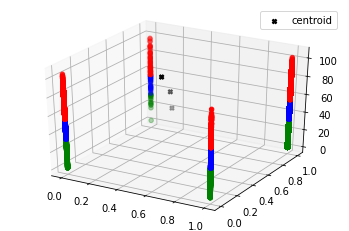

In [204]:
three_d = plt.figure().gca(projection='3d')
df_graph = [k_means_df[k_means_df.predictions==0]]

for i in range(1,num_clusters):
  df_graph.append(k_means_df[k_means_df.predictions==i])
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k','lightgreen','yellow','pink','grey','lightyellow','lightpink','lightgrey', 'purple','green']
df_graph[0]
for i in range(0,num_clusters):
  three_d.scatter(df_graph[i].f,df_graph[i].s,df_graph[i].age,color=colors[i])
three_d.scatter(Kmean.cluster_centers_[:,4],Kmean.cluster_centers_[:,21],Kmean.cluster_centers_[:,22],color='k',marker='X',label='centroid')
three_d.legend()

In [ ]:
df_to_train.recovery_type.isnull().sum()

0

##Column Transformer with Mixed Types

#pipeeline

In [ ]:
numeric_features = ['age']
categorical_features = ['sex',
'contagion_type',
'case_location',
'state',
'recovery_type',
#'ethnicity'
]

X = df_to_train.drop('recuperated', axis = 1)
y = df_to_train['recuperated']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ]
      )

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[
                      ('preprocessor', preprocessor),
                      ('classifier', KMeans(n_clusters=5, random_state=0)),
                      #('classifier', KNeighborsClassifier(n_neighbors=2)),
                      ])
                       

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [ ]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: -27371.785


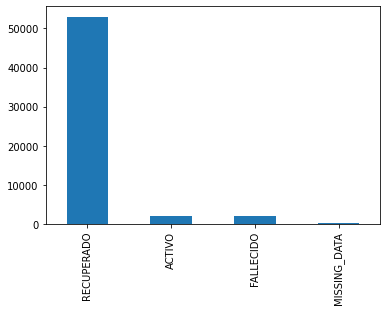

In [ ]:
y_train.value_counts().plot.bar()

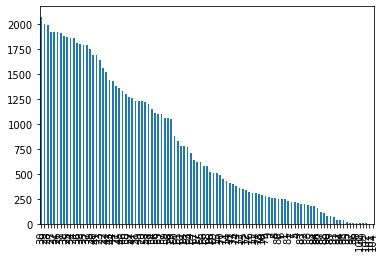

In [ ]:
df_to_train['age'].value_counts().plot.bar()

In [ ]:
X_train.head()

,age,sex,contagion_type,case_location,state,recovery_type,ethnicity
15993,29,F,COMUNITARIA,CASA,LEVE,TIEMPO,6
6912,38,F,RELACIONADO,CASA,LEVE,TIEMPO,6
73373,20,M,EN ESTUDIO,CASA,LEVE,TIEMPO,6
13659,31,F,COMUNITARIA,CASA,LEVE,TIEMPO,6
22173,3,M,COMUNITARIA,CASA,LEVE,TIEMPO,6


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57100 entries, 15993 to 68268
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             57100 non-null  int64 
 1   sex             57100 non-null  object
 2   contagion_type  57100 non-null  object
 3   case_location   57100 non-null  object
 4   state           57100 non-null  object
 5   recovery_type   57100 non-null  object
 6   ethnicity       57100 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.5+ MB


##Machine Learning Process

In [ ]:
# df_to_train
# merge_data = df_to_train.append(df_to_train)
# test_count = len(df_to_train)
# count = len(merge_data)-test_count
# X_cat = merge_data.copy()
# X_cat = merge_data.select_dtypes(include=['object'])
# X_enc = X_cat.copy()

In [ ]:
X_cat = df_to_train.select_dtypes(include=['object'])
X_enc = X_cat.copy()

In [ ]:
X_enc

,sex,contagion_type,case_location,state,recuperated,recovery_type,ethnicity
0,F,IMPORTADO,CASA,LEVE,RECUPERADO,PCR,6
1,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6
2,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6
3,M,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6
4,F,RELACIONADO,CASA,LEVE,RECUPERADO,PCR,6
...,...,...,...,...,...,...,...
81567,M,EN ESTUDIO,CASA,LEVE,ACTIVO,MISSING_DATA,MISSING_DATA
81568,M,EN ESTUDIO,CASA,LEVE,ACTIVO,MISSING_DATA,MISSING_DATA
81569,F,EN ESTUDIO,CASA,LEVE,ACTIVO,MISSING_DATA,MISSING_DATA
81570,M,EN ESTUDIO,CASA,LEVE,ACTIVO,MISSING_DATA,MISSING_DATA


In [ ]:
categorical_features = ['sex','contagion_type','case_location','state','recovery_type','recuperated','ethnicity']

#ONEHOT ENCODING BLOCK
X_enc = pd.get_dummies(X_enc, columns = categorical_features)
df_to_train = df_to_train.drop(categorical_features, axis=1)

In [ ]:
X_enc = df_to_train.append(X_enc)

In [ ]:
X_enc

,age,sex_F,sex_M,contagion_type_COMUNITARIA,contagion_type_EN ESTUDIO,contagion_type_IMPORTADO,contagion_type_RELACIONADO,case_location_CASA,case_location_FALLECIDO,case_location_HOSPITAL,case_location_HOSPITAL UCI,case_location_MISSING_DATA,state_FALLECIDO,state_GRAVE,state_LEVE,state_MISSING_DATA,state_MODERADO,recovery_type_MISSING_DATA,recovery_type_PCR,recovery_type_TIEMPO,recuperated_ACTIVO,recuperated_FALLECIDO,recuperated_MISSING_DATA,recuperated_RECUPERADO,ethnicity_1.0,ethnicity_2.0,ethnicity_5.0,ethnicity_6.0,ethnicity_MISSING_DATA
0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81567,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81568,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81569,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81570,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#ONEHOT ENCODING BLOCK#X_enc = pd.get_dummies(X_enc, columns=['sex','region','smoker'])

#mergedata = mergedata.drop(['sex','region','smoker'],axis=1)

##Pipeline
[Using scikit-learn](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

#API

##Compromiso

1. Servicio que colecta la data por departamento y la guarda en la base de datos
    * Eliminar registros por departamento y volver a consultarlos y almacenarlos
2. Servicio que recibe por parametro el id del departamento 
3. Servicio que recupera la info por municipio.


##Commitment

1. Service which collect the data from Colombia according to each departament (state)
    * Delete records per departament and request it again
2. Service which get by parameter the departament_id and return the information
3. Service get municipality info


#Documentation


request
[location and count](https://datos.gov.co/resource/gt2j-8ykr.json?$select=%20count(id_de_caso),ubicacion&$group=ubicacion)

Json
>```
count_id_de_caso	"11015"
ubicacion	"casa"
count_id_de_caso	"4028443"
ubicacion	"Casa"
count_id_de_caso	"7"
ubicacion	"CASA"
count_id_de_caso	"105326"
ubicacion	"Fallecido"
count_id_de_caso	"22865"
ubicacion	"Hospital"
count_id_de_caso	"4963"
ubicacion	"Hospital UCI"
count_id_de_caso	"14575"
ubicacion	"N/A"
```



Patient State [request](https://datos.gov.co/resource/gt2j-8ykr.json?$select=%20estado&$group=estado)


***Patient state *** 

>```
[{"estado":"Fallecido"}
,{"estado":"Grave"}
,{"estado":"leve"}
,{"estado":"Leve"}
,{"estado":"LEVE"}
,{"estado":"Moderado"}
,{"estado":"N/A"}]
```



Contagion types


**source contagion type**
[request](https://datos.gov.co/resource/gt2j-8ykr.json?$select=%20fuente_tipo_contagio&$group=fuente_tipo_contagio)

Json
>```
[
{"fuente_tipo_contagio":"Comunitaria"}
,{"fuente_tipo_contagio":"En estudio"}
,{"fuente_tipo_contagio":"Importado"}
,{"fuente_tipo_contagio":"Relacionado"}
]
```


#Bayesian Algoritm

In [ ]:
#Clustering


Advising by Ian Tomas, after meeting with Michael M. and Sebastian Romero L.

>A good place to start would be a similarity measure in your data, which you can implement with a radial basis function. This function inputs two records from your data set and outputs a single number between 0 and 1 which represents how similar the two records are, where a value closer to 1 means they are more similar, closer to 0 means they are different. This is a good idea to use if you want to represent your data as a graph as typically the similarity measure can work as an edge weight in a graph.

```
 void vectorsubtraction(vector<float> v1, vector<float> v2, vector<float> &v3){

    int i;
    //vectors must be same size
    if(v1.size() != v2.size()) return;
    for(i = 0; i < v1.size(); i++){
        //if symbolic attribute, push 1 to represent not equal, 0 to represent equal
        if(symbolic(i)){
          v3.push_back(v1[i] != v2[i]);
          //if continous, subtract values
        } else {
          v3.push_back((v1[i] - v2[i]));
        }
    }
}

float normalizevector(vector<float> v){

    int i;
    float total = 0.0;
    for(i = 0; i < v.size(); i++){
        total += (v[i] * v[i]);
    }

    return sqrt(total);
}

double edgeweight(vector<float> v1, vector<float> v2){

    vector<float> v3;
    vectorsubtraction(v1, v2, v3);

    float normalized = normalizevector(v3);
    double base = exp(normalized);
    return (1 / base);
}
```



In [ ]:
#Python code of barycentric clustering


In [ ]:
#from sklearn.preprocessing import OneHotEncoder

In [ ]:
#df_to_use_in_pca = df_to_use_in_pca.apply(pd.to_numeric)

#knn

> Step 1: Determine the value for K

> Step 2: Calculate the distances between the new input (test data) and all the training data. The most commonly used metrics for calculating distance are Euclidean, Manhattan and Minkowski

> Step 3: Sort the distance and determine k nearest neighbors based on minimum distance values

> Step 4: Analyze the category of those neighbors and assign the category for the test data based on majority vote

> Step 5: Return the predicted class

#Clustering

In [ ]:
dfn['recuperated']

NameError: ignored

In [ ]:
#for i in df_to_use_in_pca:
#  df_to_use_in_pca[i].astype(int)

enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(
    enc.fit_transform(
        dfn['recuperated']).toarray())

# converted = df_to_use_in_pca.to_numpy()
# print(converted)
# enc.fit(converted)

#Label Encoding

In [ ]:
#from sklearn.preprocessing import LabelEncoder

In [ ]:
df.columns

In [ ]:
df['case_location_encoded'] = LabelEncoder().fit_transform(df['case_location'])
df[['case_location', 'case_location_encoded']] # special syntax to get just these two columns

In [ ]:
df.head(200)

In [ ]:
print(df.dtypes)

Statistics # Statistics to develop

References:


1.   [Categorical Imputer](https://feature-engine.readthedocs.io/en/latest/imputation/CategoricalImputer.html#categoricalimputer)
2.   [another reference](https://)
3.   another reference

